# Carga datos places desde el bucket de AWS

In [18]:
"""   Librerías   """
import pandas as pd # Manipulación y EDA
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos
from dataAccess import aws_df_from_S3_csv # AWS

In [185]:
dataset = aws_df_from_S3_csv("Arnau/places_total.csv")
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
dataset.head()

,Unnamed: 0,place_id,name,business_status,rating,user_ratings_total,price_level,scope,types,find_type,lat,lon
0,0,ChIJFxKKG7wnQg0RNYE_E60EZ7g,La Madreña Santa Lucrecia,OPERATIONAL,3.8,1348,2,GOOGLE,"['restaurant', 'food', 'point_of_interest', 'e...",restaurant,40.386727,-3.718799
1,1,ChIJo3OI7JYnQg0RGV2mWtE-9v8,Restaurante World,OPERATIONAL,4.0,220,1,GOOGLE,"['restaurant', 'food', 'point_of_interest', 'e...",restaurant,40.385361,-3.726651
2,2,ChIJwXyYMZEnQg0Rb9hEHqaxtO8,Bar Alfonsillo,OPERATIONAL,4.5,402,1,GOOGLE,"['cafe', 'bar', 'restaurant', 'food', 'point_o...",restaurant,40.384738,-3.728618
3,3,ChIJbYvKyL0nQg0R981bqgVos40,Mesón A Casiña,OPERATIONAL,4.4,333,1,GOOGLE,"['restaurant', 'cafe', 'bar', 'food', 'point_o...",restaurant,40.385918,-3.721233
4,4,ChIJvz9205AnQg0RC21REfqPWeU,Doner Kebab Lima,OPERATIONAL,3.3,13,-1,GOOGLE,"['meal_delivery', 'restaurant', 'food', 'point...",restaurant,40.383741,-3.728431


# EDA

## Primer vistazo a los datos

In [23]:
# Número de registros que contiene el dataset
print("El dataset contiene un total de {} establecimientos.\n".format(len(dataset)))

El dataset contiene un total de 13556 establecimientos.



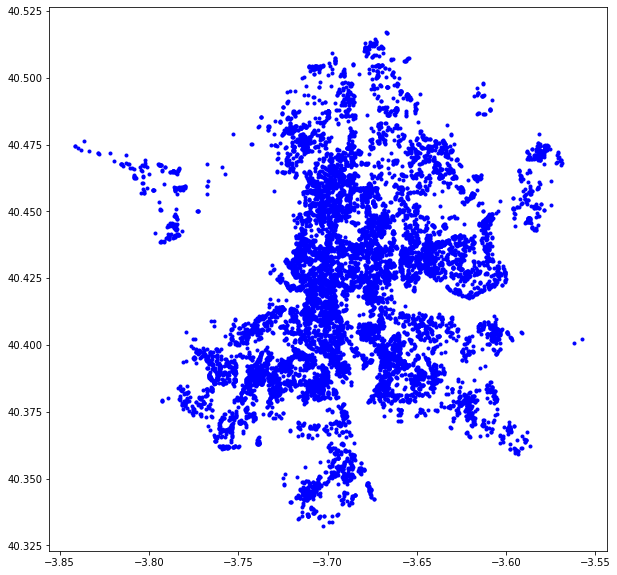

In [9]:
plt.figure(figsize=(10,10))
plt.plot(dataset["lon"],dataset["lat"],'b.')
plt.show()

OPERATIONAL           13273
CLOSED_TEMPORARILY      281
NOT DEFINED               2
Name: business_status, dtype: int64


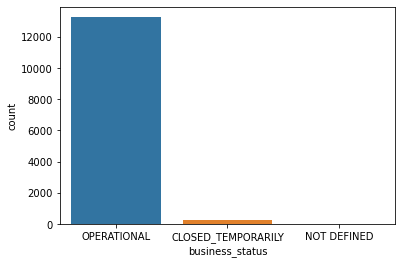

In [11]:
print(dataset["business_status"].value_counts())
sns.countplot(x = "business_status", data = dataset)
plt.show()

-1    7304
 1    4584
 2    1466
 3     172
 4      30
Name: price_level, dtype: int64


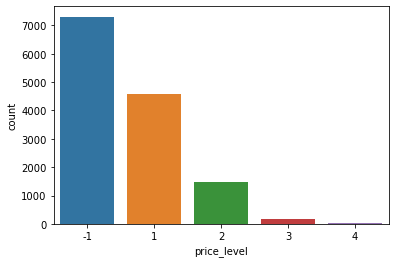

In [109]:
print(dataset["price_level"].value_counts())
sns.countplot(x = "price_level", data = dataset)
plt.show()

restaurant    7883
bar           4858
night_club     815
Name: find_type, dtype: int64


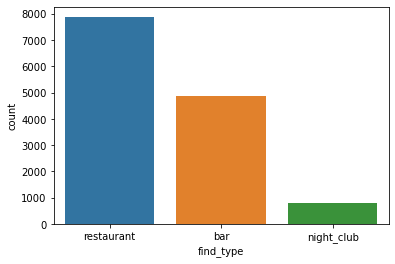

In [13]:
print(dataset["find_type"].value_counts())
sns.countplot(x = "find_type", data = dataset)
plt.show()

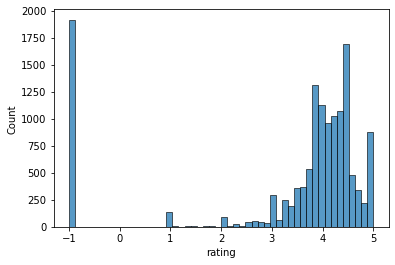

In [108]:
sns.histplot(x = "rating", data = dataset, bins = 50)
plt.show()

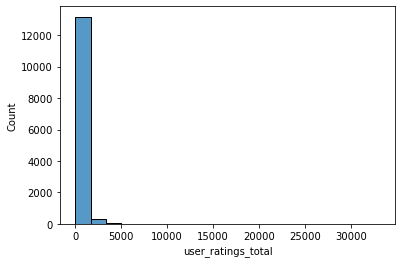

In [15]:
sns.histplot(x = "user_ratings_total", data = dataset, bins = 20)
plt.show()

### Conclusiones

   - **business_status**: Una posible decisión es quedarnos solo con la categoría OPERATIONAL, ya que las otras dos no aseguran que el establecimiento esté activo y están muy poco representadas.
   - **rating**: Estudiar en detalle los establecimientos que no tienen puntuación y decidir qué hacer con esos datos.
   - **user_ratings_total**: Estudiar en detalle los establecimientos que tienen pocas reviews para ver la fiabilidad de los datos subjetivos.
   - **find_type**: Tratar el array y ver cómo puede ser útil su información para la parte de feature engineering
   - **price_level**: Esta variable es muy importante. Su estudio se abordará tras estudiar las anteriores, ya que esta contiene muchos valores perdidos en el dataframe inicial y es más delicado tomar decisiones.

## Q1 - rating

In [156]:
q1 = dataset[(dataset["rating"] >= 1) & (dataset["rating"] <= 3)]
len(q1)

781

1       260
2       164
3        58
4        33
5        29
       ... 
2081      1
100       1
101       1
107       1
777       1
Name: user_ratings_total, Length: 93, dtype: int64


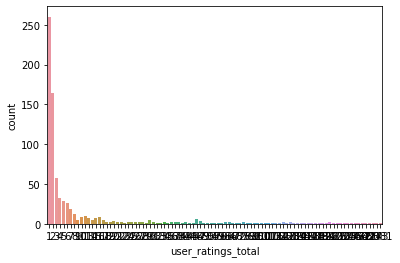

In [157]:
print(q1["user_ratings_total"].value_counts())
sns.countplot(x = "user_ratings_total", data = q1)
plt.show()

OPERATIONAL           760
CLOSED_TEMPORARILY     21
Name: business_status, dtype: int64


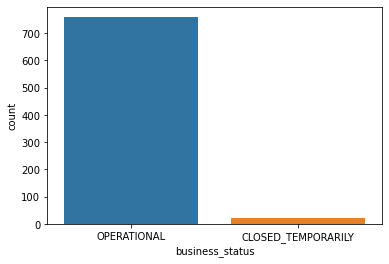

In [158]:
print(q1["business_status"].value_counts())
sns.countplot(x = "business_status", data = q1)
plt.show()

-1    703
 1     64
 2      9
 3      3
 4      2
Name: price_level, dtype: int64


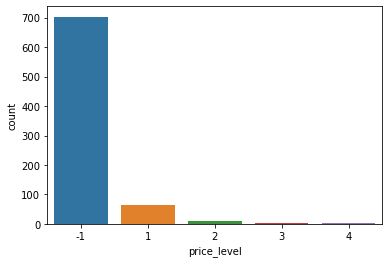

In [159]:
print(q1["price_level"].value_counts())
sns.countplot(x = "price_level", data = q1)
plt.show()

## Q2 - user_ratings_total

In [151]:
q2 = dataset[dataset["user_ratings_total"] < 2]
len(q2)

2690

-1.0    1915
 5.0     362
 4.0     153
 1.0     115
 3.0     110
 2.0      35
Name: rating, dtype: int64


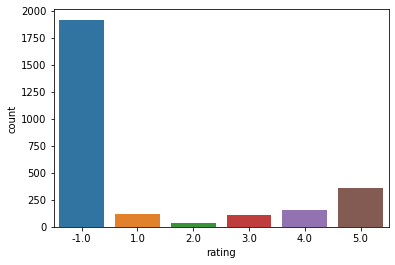

In [107]:
print(q2["rating"].value_counts())
sns.countplot(x = "rating", data = q2)
plt.show()

-1    3143
 1      26
 2       3
Name: price_level, dtype: int64


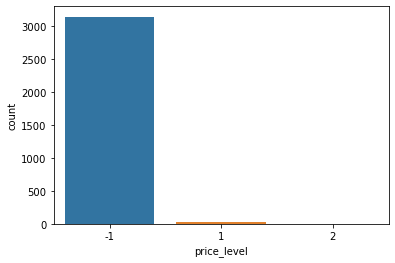

In [57]:
print(q2["price_level"].value_counts())
sns.countplot(x = "price_level", data = q2)
plt.show()

## Q3 - price_level

In [102]:
q3 = dataset[dataset["price_level"] == -1]
len(q3)

7304

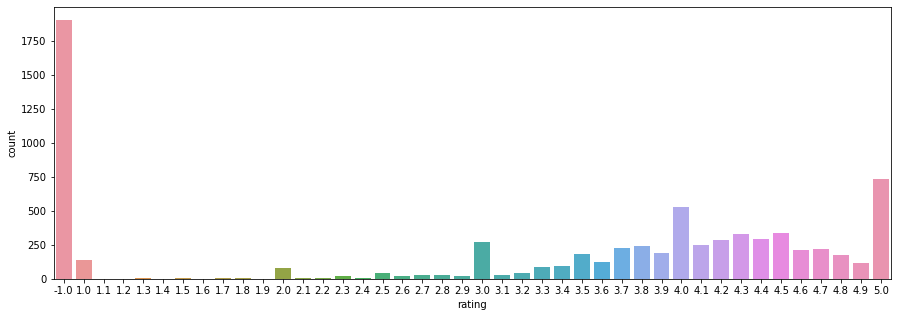

In [103]:
#print(q3["rating"].value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x = "rating", data = q3)
plt.show()

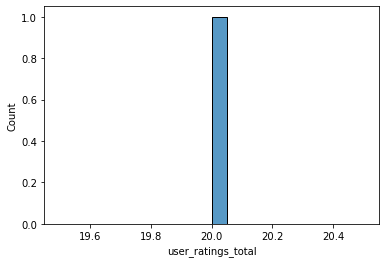

In [97]:
q3_1 = q3[q3["user_ratings_total"] < 25]
sns.histplot(x = "user_ratings_total", data = q3_1, bins = 20)
plt.show()

# print(q3["user_ratings_total"].value_counts())

# plt.figure(figsize=(15,5))
# sns.countplot(x = "user_ratings_total", data = q3)
# plt.show()

## Q4 - business_status

In [121]:
q4 = dataset[dataset["business_status"] == "CLOSED_TEMPORARILY"]
len(q4)

281

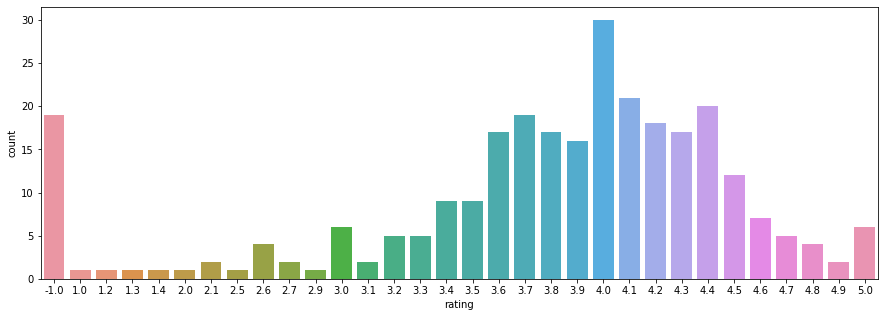

In [124]:
plt.figure(figsize=(15,5))
sns.countplot(x = "rating", data = q4)
plt.show()

-1    141
 1     73
 2     52
 3     15
Name: price_level, dtype: int64


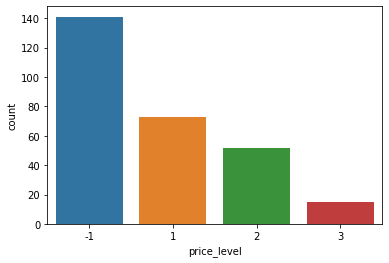

In [125]:
print(q4["price_level"].value_counts())
sns.countplot(x = "price_level", data = q4)
plt.show()

## Conclusiones
   - Los establecimientos sin **rating** tampoco tienen **user_ratings_total** y viceversa (1915 registros).
   - Existen 2690 establecimientos que han sido valorados por menos de dos usuarios (uno o ninguno, poco fiable).
   - Los establecimientos con **price_level = 3** tienen como mínimo 4 reviews y los de **price_level = 4** tienen un mínimo de 20. Ambos tienen un **rating** siempre superior a 2.
   - Los establecimientos con **business_status = CLOSED_TEMPORARILY** siguen la misma distribución que los **OPERATIONAL**.

# Filtrado de datos

## D1 - Eliminamos los registros que no están actualmente operativos

Se puede ser menos restrictivo y eliminar solo aquellos de los que no se dispone información (NOT DEFINED).

In [186]:
d1 = dataset[dataset["business_status"] == "OPERATIONAL"]
len(d1)

13273

## D2 - Eliminamos los registros con menos de 2 reviews

In [187]:
d2 = d1[d1["user_ratings_total"] > 1]
len(d2)

10614

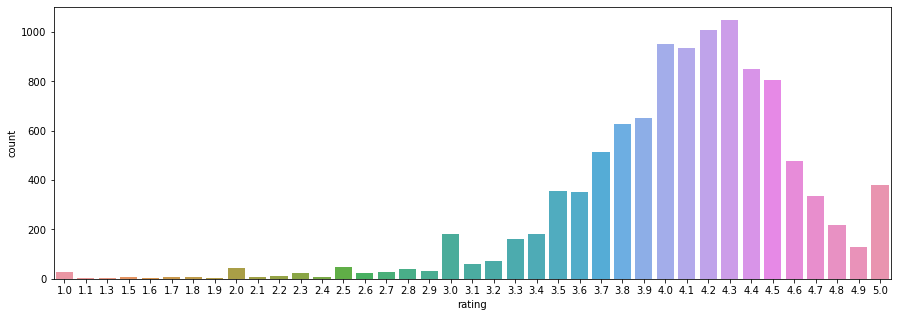

In [188]:
#print(d1["rating"].value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x = "rating", data = d2)
plt.show()

# Dataset depurado

In [190]:
data_clean = d2

OPERATIONAL    10614
Name: business_status, dtype: int64


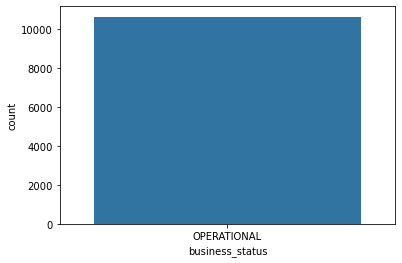

In [132]:
print(data_clean["business_status"].value_counts())
sns.countplot(x = "business_status", data = data_clean)
plt.show()

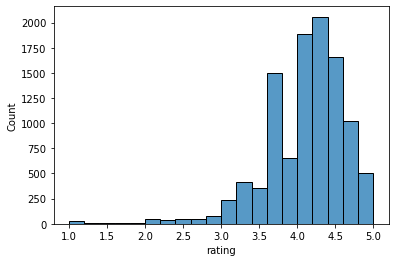

In [135]:
sns.histplot(x = "rating", data = data_clean, bins = 20)
plt.show()

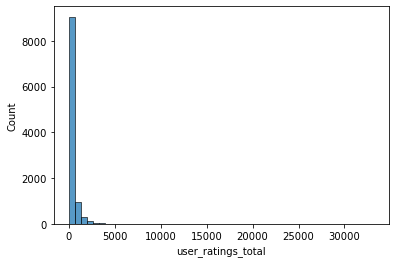

In [170]:
sns.histplot(x = "user_ratings_total", data = data_clean, bins = 50)
plt.show()

-1    4527
 1    4490
 2    1410
 3     157
 4      30
Name: price_level, dtype: int64


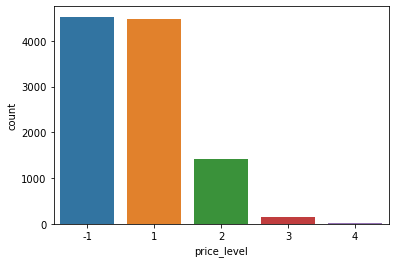

In [133]:
print(data_clean["price_level"].value_counts())
sns.countplot(x = "price_level", data = data_clean)
plt.show()

In [195]:
# Guardamos los datos en local
data_clean.to_csv("places_clean.csv")

# Subir los datos a S3

In [196]:
# El fichero a subir tiene que estar guardado en local
aws_subir_archivo_s3("data2gether-playground","places_clean.csv","Arnau") # Si funciona devuelve true

True